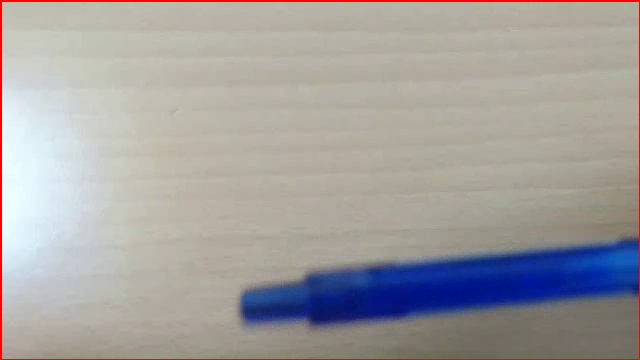

KeyboardInterrupt: ignored

In [79]:
#參考10
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
import codecs
np.set_printoptions(threshold=np.inf) #這個用來把numpy矩陣的output上限調高(輸出不做省略)>np.inf=任何數字
p1=cv2.VideoCapture("h3.mp4")
p2=cv2.VideoWriter("1.mp4", cv2.VideoWriter_fourcc(*'MJPG'), 30, (640,360)) #這裡是寬,長
# print("畫面寬：",p1.get(3)) #640
# print("畫面高：",p1.get(4)) #360
# print("畫面影格數(FPS)：",p1.get(5)) #每秒跑30張
# print("影片的總影格數：",p1.get(7)) #總共509張

while p1.isOpened()==True:
  ret, m1=p1.read() #ret>有無? m1>變數
  if ret==True:
      m2=cv2.inRange(m1, (30,0,0), (200,200,90))  
      #我上網抓色碼,抓到這個筆藍色的範圍是(以下是RGB!)：(16,51,51)~(80,199,199)
      #調整抓的範圍:我把下限的藍色門檻維持不變,改後面的G&R下調,就抓到更多藍色
      #再次嘗試:我把上限的R門檻上調,筆蓋就明顯一點了 >>> 雖然下面的白色變多,但是我打算用面積去抓,這邊下面的白色還是不大 >>> 而且這樣的結果我認為不需要再做侵蝕 >>> 錯了,要考慮到每一張,所以還是要做
      m2=cv2.erode(m2,np.ones((2,5)))

      #輪廓點a[裡面有len(a)個輪廓,並且儲存每個輪廓的點], 輪廓階層資料b[用來記錄所有輪廓之間的索引&階層關係]=cv2.findContours(圖像變數(灰階圖像),儲存所有輪廓,儲存所有輪廓點)
      #前兩個參數: contours and hierarchy 是輪廓和層次結構，輪廓是影象中所有輪廓的python列表，每個單獨的輪廓是物件邊界點的(x,y)座標的Numpy陣列
      a, b=cv2.findContours(m2,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) #這裡抓所有輪廓
      
      #開始找指定筆的輪廓,我打算以面積來尋找
      max=0
      for i in range(1,len(a),1): #從1開始,不能包含0,因為a[0]是最外圈,範圍一定最大,會抓到他
        #取得包覆指定輪廓點的最小正矩形：X座標, Y座標, 寬度, 高度 =cv2.boundingRect(指定的輪廓) 
        x1, y1, w1, h1 =cv2.boundingRect(a[i])
        x2, y2, w2, h2 =cv2.boundingRect(a[max])
        if w1*h1>w2*h2: #比較輪廓面積大小,知道哪個是最大的(星星),用max去存取他的索引值  
          max=i 
      try:
        xm, ym, wm, hm =cv2.boundingRect(a[max]) 
        cv2.rectangle(m1, (xm,ym), (xm+wm,ym+hm), (0,0,255), 2)
      except:
        continue
      dp.clear_output(True)
      cv2_imshow(m1)
      p2.write(m1)
      time.sleep(0.1)
    
    #解一>>但不會是框框
    # m3=np.full(m1.shape,(0,0,0),np.uint8) #建立一個黑色畫布(用來相加)
    # # cv2.drawContours(圖像變數,存取全部輪廓的變數=a,要繪製的輪廓索引=max(print出來會知道是第28個),顏色用紅色,粗細)
    # cv2.drawContours(m3,a,max,(0,0,255),3) 
    # m3=cv2.add(m1,m3)

  else: #ret!=Ture,基本上就是false,代表圖像讀完了
    break
p2.release()

In [78]:
#僅限colab,轉檔成html的格式
!ffmpeg -i 1.mp4 -vcodec libx264 2.mp4 #檔案類型轉換 ffmpeg -i 來源檔案 -vcodec libx264 目標檔案

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
#   # for x,y in a[max][0]:
#   #   x,y=a[max][0][0]
#   #   print(x,y)

#   # for x,y in a:
#   #   print(np.where(a[max] == [x,y]),x,y)
#   cv2_imshow(m3)
#   print("輪廓數量：",len(a))
#   print("最大輪廓Index:",max)
  # cv2_imshow(m1)

#for test
    # if p1.get(1) > 410 and p1.get(1) < 412: #print test
    # # #   cv2_imshow(m1)
    # # #   cv2_imshow(m2)

    # # #這裡在做矩陣測試:
    #   #先看他的輪廓點長什麼樣子,對比老師的紅框圖,可以發現> 矩形起點:x,y最小 , 終點x,y最大
    #   # w = str(a[max])
    #   # with codecs.open('1.txt','w','utf8') as f:
    #   #   f.write(w) 

    # #   # print(a[max][961][0]) #a[max][i][o]
    #   # print(len(a[max]))#測出有962個點 0-961
    # #   # x,y=a[max][0][0]
    # #   # print(x,y)

    # #   #測試成功
    #   start_x = 0
    #   start_y = 0
    #   end_x = 0
    #   end_y = 0
    #   ind_x = 0
    #   ind_y = 0
    #   ind2_x = 0
    #   ind2_y = 0
    #   for i in range(0,len(a[max])): #len(a[max])表示有幾個點
    #     y1,x1=a[max][i][0]
    #     y2x,x2x=a[max][ind_x][0]
    #     y2y,x2y=a[max][ind_y][0]
    #     y3x,x3x=a[max][ind2_x][0]
    #     y3y,x3y=a[max][ind2_y][0]
    #     # print(x,y) #這裡可以把每個點都印出來
    #     # 這裡的x是y軸,y是x軸      
    #     if y1 <= y2y:
    #       start_y = y1
    #       ind_y = i
    #     if x1 <= x2x:
    #       start_x = x1 
    #       ind_x = i         
    #     if y1 >= y3y:
    #       end_y = y1
    #       ind2_y = i
    #     if x1 >= x3x:
    #       end_x = x1
    #       ind2_x = i
    #     # print(f"第{i}圈,{x1},{y1},{x2},{y2},{x3},{y3}")
    #   print(start_x,start_y,end_x,end_y)#start_x,start_y,end_x,end_y
    #   cv2.rectangle(m1, (start_y,start_x), (end_y,end_x), (0,0,255), 5) #x&y要注意

In [ ]:
    #找到輪廓物件了,開始做標記
      start_x = 0
      start_y = 0
      end_x = 0
      end_y = 0
      ind_x = 0
      ind_y = 0
      ind2_x = 0
      ind2_y = 0

      # print(len(a[max]))
      for j in range(0,len(a[max])-1,1): #len(a[max])表示有幾個點
        y1,x1=a[max][j][0]
        y2x,x2x=a[max][ind_x][0]
        y2y,x2y=a[max][ind_y][0]
        y3x,x3x=a[max][ind2_x][0]
        y3y,x3y=a[max][ind2_y][0]
        # print(x,y) #這裡可以把每個點都印出來
        # 這裡的x是y軸,y是x軸,用比大小的方式找出起點(x最小,y最小)、終點(x最大,y最大) >>> 因為他們可能不在同一個輪廓點,所以只能把x,y值分開來取    
        if y1 <= y2y:
          start_y = y1
          ind_y = j
        if x1 <= x2x:
          start_x = x1 
          ind_x = j         
        if y1 >= y3y:
          end_y = y1
          ind2_y = j
        if x1 >= x3x:
          end_x = x1
          ind2_x = j
        # print(f"第{i}圈,{x1},{y1},{x2},{y2},{x3},{y3}")
      # print(start_x,start_y,end_x,end_y)#start_x,start_y,end_x,end_y
      dp.clear_output(True)
      m2 = m1.copy()
      cv2.rectangle(m2, (start_y,start_x), (end_y,end_x), (0,0,255), 5) #x&y要注意
      print(f'第{i}張')